In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [2]:
# Load cleaned listings csv's for Oct 2022 and 2023
l_df23 = pd.read_csv("../listings_oct_2023_clean.csv")
l_df22 = pd.read_csv("../listings_oct_2022_clean.csv")

In [3]:
l_df23.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'price', 'room_type', 'accommodates',
       'amenities', 'minimum_nights', 'minimum_minimum_nights',
       'review_scores_rating', 'review_scores_location', 'license',
       'reviews_per_month'],
      dtype='object')

In [4]:
l_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40545 non-null  int64  
 1   id                            40545 non-null  int64  
 2   host_id                       40545 non-null  int64  
 3   host_listings_count           40522 non-null  float64
 4   neighbourhood_cleansed        40545 non-null  object 
 5   neighbourhood_group_cleansed  40545 non-null  object 
 6   latitude                      40545 non-null  float64
 7   longitude                     40545 non-null  float64
 8   property_type                 40545 non-null  object 
 9   price                         40545 non-null  object 
 10  room_type                     40545 non-null  object 
 11  accommodates                  40545 non-null  int64  
 12  amenities                     40545 non-null  object 
 13  m

In [5]:
# Build Dataframe to analyze minimum night listings
# Create bins
bins = ["1-29","30","30+"]
dfs = [l_df22, l_df23]
year = ["Before Ban - 2022", "After Ban - 2023"]
min_nights_df = pd.DataFrame()

min_nights_df["Minimum Nights"] = bins 
min_nights_df["Before Ban - 2022"] = ""
min_nights_df["After Ban - 2023"] = ""
        
for i in range(len(dfs)):
    #min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==0].count()
    min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][(dfs[i]["minimum_nights"]>=1) & (dfs[i]["minimum_nights"]<30)].count()
    min_nights_df[year[i]][1] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==30].count()
    min_nights_df[year[i]][2] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]>30].count()
    
min_nights_df.head()

,Minimum Nights,Before Ban - 2022,After Ban - 2023
0,1-29,21314,3227
1,30,17256,33273
2,30+,1975,2292


In [6]:
min_nights_df = min_nights_df.astype({"Before Ban - 2022": int, "After Ban - 2023": int})

min_nights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Minimum Nights     3 non-null      object
 1   Before Ban - 2022  3 non-null      int32 
 2   After Ban - 2023   3 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 180.0+ bytes


In [ ]:
# side by side boxplot
min_nights_df.plot(x="Minimum Nights", y=["Before Ban - 2022","After Ban - 2023"], kind="bar", title="Listings by Minimum Nights")
plt.ylabel("Count")

# plt.savefig("min_night_listings")

plt.show()

In [13]:
# Create dataframes for boxplots
x1 = l_df22["minimum_nights"][l_df22["minimum_nights"]<=100]
x2 = l_df23["minimum_nights"][l_df23["minimum_nights"]<=100]


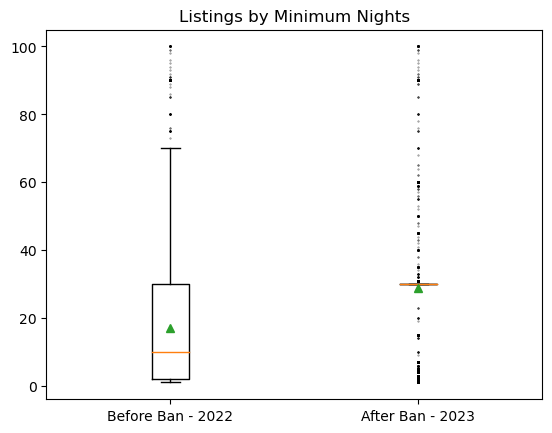

In [22]:
# Boxplots of minimum nights
ax = plt.boxplot([x1, x2], showmeans=True)
plt.xticks(ticks=[1, 2], labels= ["Before Ban - 2022", "After Ban - 2023"])
plt.title("Listings by Minimum Nights")
plt.setp(ax['fliers'], markersize=.5, alpha=.5)

plt.show()

In [23]:
l_df22.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'price', 'room_type', 'accommodates',
       'amenities', 'minimum_nights', 'minimum_minimum_nights',
       'review_scores_rating', 'review_scores_location', 'license',
       'reviews_per_month'],
      dtype='object')

In [41]:
# Group the neighbourhood-groups(Boroughs) and find the average review rating for short term rentals
ratings_short_term_df22 = l_df22[["neighbourhood_group_cleansed","review_scores_rating"]][l_df22["minimum_nights"]<30]
ratings_short_term_df23 = l_df23[["neighbourhood_group_cleansed","review_scores_rating"]][l_df23["minimum_nights"]<30]

rst_df22 = ratings_short_term_df22
rst_df23 = ratings_short_term_df23

# Find average and group by neighborhood group
rst_avg_df22 = rst_df22.groupby("neighbourhood_group_cleansed").mean()
rst_avg_df23 = rst_df23.groupby("neighbourhood_group_cleansed").mean()

# Rename the columns
rst_avg_df22.columns = ["2022"]
rst_avg_df23.columns = ["2023"]

# Merge dataframes
rst_avg_df = rst_avg_df22
# Add 2023 column
rst_avg_df["2023"] = rst_avg_df23

display(rst_avg_df)

,2022,2023
neighbourhood_group_cleansed,,
Bronx,4.688423,4.432222
Brooklyn,4.758743,4.803647
Manhattan,4.680156,4.592987
Queens,4.706997,4.776994
Staten Island,4.733104,4.473077


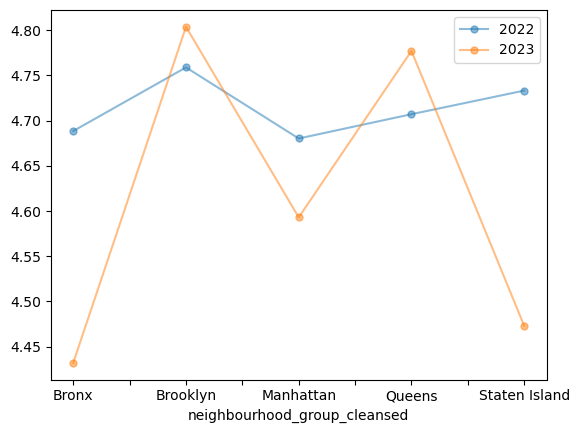

In [45]:
# Plot average review rating
lines = rst_avg_df.plot.line(alpha=.5, marker=".", markersize=10)


plt.show()

In [47]:
# Group the neighbourhoods and find the average review rating for short term rentals
ratings_short_term_df22 = l_df22[["neighbourhood_cleansed","review_scores_rating"]][l_df22["minimum_nights"]<30]
ratings_short_term_df23 = l_df23[["neighbourhood_cleansed","review_scores_rating"]][l_df23["minimum_nights"]<30]

rst_df22 = ratings_short_term_df22
rst_df23 = ratings_short_term_df23

# Find average and group by neighborhood group
rst_avg_df22 = rst_df22.groupby("neighbourhood_cleansed").mean()
rst_avg_df23 = rst_df23.groupby("neighbourhood_cleansed").mean()

# Rename the columns
rst_avg_df22.columns = ["2022"]
rst_avg_df23.columns = ["2023"]

# Merge dataframes
rst_avg_df_n = rst_avg_df22
# Add 2023 column
rst_avg_df_n["2023"] = rst_avg_df23

display(rst_avg_df_n.describe())

,2022,2023
count,238.000000,117.000000
mean,4.722653,4.776380
std,0.144242,0.194615
min,3.660000,3.791667
25%,4.667179,4.699286
50%,4.737083,4.820500
75%,4.810750,4.915000
max,5.000000,5.000000


There are 121 neighborhoods that no longer have any short term airbnb listings!!!


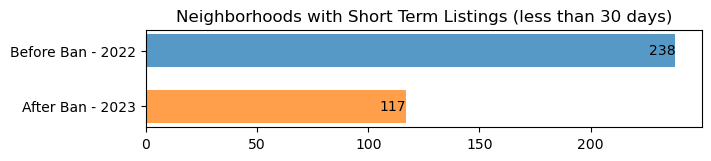

In [85]:
# Plot neighborhood count pre/post ban for short term rentals
st_listing_count_22 = rst_avg_df_n["2022"].count()
st_listing_count_23 = rst_avg_df_n["2023"].count()
short_term_listing_count = [st_listing_count_23, st_listing_count_22]
x = ["After Ban - 2023", "Before Ban - 2022"]

print("There are 121 neighborhoods that no longer have any short term airbnb listings!!!")

plt.figure(figsize=[7,1.5], layout='constrained', edgecolor='r')
plt.barh(x, short_term_listing_count, height=.6, align="center", color=['tab:orange','tab:blue'], 
         alpha=.75, )
plt.title("Neighborhoods with Short Term Listings (less than 30 days)")


for index, value in enumerate(short_term_listing_count):
    plt.text(value, index,
             str(value), horizontalalignment='right', verticalalignment='center')

plt.show()


There are 121 neighborhoods that no longer have any short term airbnb listings!!!


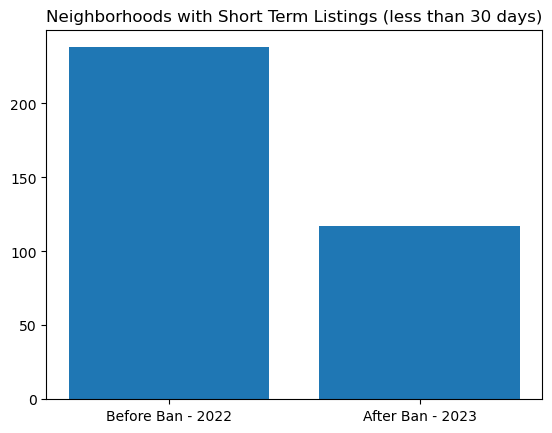

In [74]:
# Plot neighborhood count pre/post ban for short term rentals
st_listing_count_22 = rst_avg_df_n["2022"].count()
st_listing_count_23 = rst_avg_df_n["2023"].count() 
short_term_listing_count = [st_listing_count_22, st_listing_count_23]
x = ["Before Ban - 2022", "After Ban - 2023"]

print("There are 121 neighborhoods that no longer have any short term airbnb listings!!!")

plt.bar(x=x, height=short_term_listing_count)
plt.title("Neighborhoods with Short Term Listings (less than 30 days)")

# for index, value in enumerate(short_term_listing_count):
#     plt.text(value, index,
#              str(value))

plt.show()


In [86]:
# Look at reviews data
reviews_df23 =pd.read_csv("../airbnb_reviews_oct_1_2023.csv")

In [87]:
reviews_df23.head()

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25
